# Fallstudie: Energiebilanz einer Spritzgießmaschine

- [ ] TODO Zitierweise, Danksagung Förderung einfügen

## python konfigurieren

### Module importieren

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.sankey import Sankey
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

ModuleNotFoundError: No module named 'plotly'

### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"
pd.set_option('display.latex.repr', True)
pd.set_option('display.latex.longtable', True)

- [ ] TODO am Anfang immer die gleichen Layoutparameter laden -> in allen notebooks aktualisieren

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diesen Abschnitt:</b></div>
    <ul>
        <li> was </li>
        <li> womit </li>
        <li> wozu </li>
    </ul>
</div>

## Was macht eine Spritzgießmaschine?

[Animation 3 Minuten Dauer](https://www.youtube.com/watch?v=ACf3SqlZ0vQ&feature=youtu.be)

{cite:p}`dimmler_antriebs_2011` zeigt Potenziale auf:
- elektrische Dosierantriebe sind effizienter (bis $\eta=96\%$) als hydraulische (bis $\eta=0,86\%$)

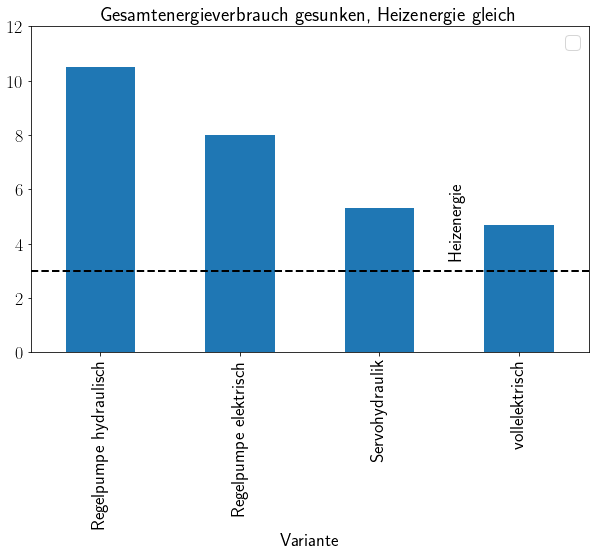

In [3]:
fig,ax = plt.subplots()
bessereantriebespritzgiess = [['Regelpumpe hydraulisch', 10.5],['Regelpumpe elektrisch', 8],['Servohydraulik',5.3],['vollelektrisch',4.7]]
bessereantriebespritzgiessdf = pd.DataFrame(bessereantriebespritzgiess,columns = ['Variante', 'Energie [kWh]'])
bessereantriebespritzgiessdf.plot.bar(x='Variante', y='Energie [kWh]', title = 'Gesamtenergieverbrauch gesunken, Heizenergie gleich', ax=ax)
ax.set_ylim(0,12)
ax.plot([-1,5],[3,3],'k--')
ax.text(2.5,3.5,'Heizenergie',rotation=90)
ax.legend([]);

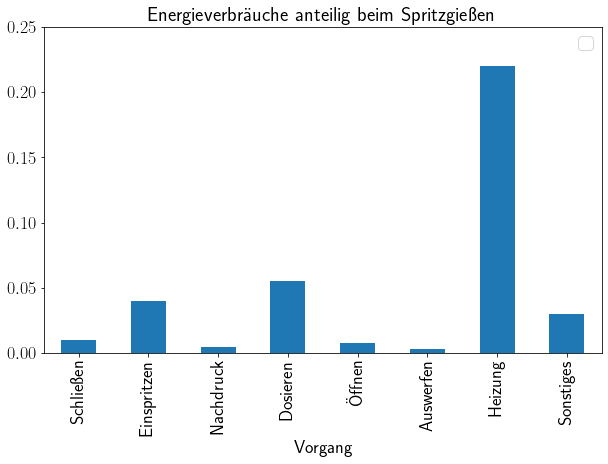

In [4]:
fig,ax = plt.subplots()
spritzgiessenergieverbrauche = [['Schließen', 0.01], ['Einspritzen', 0.04], ['Nachdruck', 0.005], ['Dosieren', 0.055], ['Öffnen', 0.008], ['Auswerfen', 0.003], ['Heizung', 0.22], ['Sonstiges', 0.03]]
spritzgiessEnergie = pd.DataFrame(spritzgiessenergieverbrauche, columns = ['Vorgang', 'spezifische Energie [kWh/kg]'])
spritzgiessEnergie.plot.bar(x = 'Vorgang', y = 'spezifische Energie [kWh/kg]', title='Energieverbräuche anteilig beim Spritzgießen',ax=ax)
ax.set_ylim(0,0.25)
ax.legend([]);

Alternativen für Heizenergieeinsparungen {cite:p}`dimmler_antriebs_2011`:
- Isolieren ca. 22%
- Absaugung mit Isolierung ca. 22%
- Induktionsheizung ca. 21%

### Energieflüsse

- elektrische Leistung $P_{\text{el}}$
- Wärmestrahlung der Maschine $\dot{Q_{\text{rad}}}$
- Konvektive Wärmeabfuhr der Maschine $\dot{Q_{\text{konv}}}$
- Kühlwasser Hydraulik $\dot{Q_{\text{Kühlwasser,Hydraulik}}}$
- Kühlwasser Spritzgußform $\dot{Q_{\text{Kühlwasser,Form}}}$ 

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Skizzieren Sie das System der Spritzgußmaschine und ergänzen Sie die Energieflüsse als Pfeile. Stellen Sie daraus eine Gleichung für die Energiebilanz auf.
</div>

*Antwort:...*

## Vorgehensweise zur Durchführung von Energieeffizienzmaßnahmen (nach {cite:p}`verein_deutscher_ingenieure_vdi_1998`) am fiktiven Beispiel der Plastastic GmbH & Co. KG

### Kontaktaufnahme

![Produktionslinie](https://images.unsplash.com/photo-1589792923910-d9e81a470d11?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

| **Informationsart** | **Antwort Plastastic GmbH & Co. KG** |
|-|-|
| Produkte und Produktionsverfahren| Plastikflaschen mithilfe eines Blasformverfahrens (ähnlich Spritzguß) |
| produktionstechnische Anlagen | 10 Linien zur Kunststoffverarbeitung |
| versorgungstechnische Anlagen | Druckluftsystem, Beleuchtung |
| Arbeitszeiten | Drei-Schicht-Betrieb durchgängig |
| Energiebezug | 10 GWh/Jahr | 
| Energieerzeugung | PV |
| installierte Messtechnik | Energiezähler am Stromübergabepunkt, Gaszähler |
| Abwärme | unbekannt |
| Entwicklung | Firma wächst, da mehr Plastikflaschen gekauft werden | 
| Organigramm | Firma gehört seit zwei Jahren Investor, Chefs ausgetauscht |

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Informationen fehlen? Welche Informationen empfiehlt die VDI 3922 zusätzlich abzufragen? Wie könnte man das besser bewerten?
</div>

*Antwort:...*

### Brancheninfos recherchieren

{cite:p}`conversio_kurzfassung_2020` nennt für Deutschland
- in 2019 ca. 20,2 Mio. t Kunststoffproduktion (Neuware und Rezyklat sowie sonstige wie Kleber, Farben, Lacke Fasern)
 - davon Neuware 18,2 Mio. t (6,6% unterhalb Niveau des Jahres 2017)
 - davon Rezyklate 2,0 Mio. t
- in 2019 ca. 14,2 Mio. t Kunststoffverarbeitung (0,9% unterhalb Niveau des Jahres 2017)
 - leicht gestiegene Mengen in Bau, Landwirtschaft, Medizin
 - leicht zurückgehende Mengen in Verpackung, Fahrzeugen, Elektro/Elektronik, Haushaltswaren, Sport/Spiel/Freizeit, Möbel
 - Rezkylateinsatz 1,9 Mio. t (10,2% mehr als in 2017)
- 99% der Kunststoffabfälle verwertet
 - 47% stofflich (werkstofflich)
 - 53% energetisch

{cite:p}`plasticseurope_plastics_2019` nennt für Europa
- über 1,5 Mio. Beschäftige in der europäischen Kunststoffindustrie
- knapp 60.000 Firmen, die meisten KMUs
- über 350 Billionen Euro Umsatz in 2017
- Produktionswachstum von 60 Mio. t in 2016 auf 64.4 Mio. t in 2017 (weltweit 335 Mio. t auf 348 Mio. t gesunken im selben Zeitraum)
- 18,5% der weltweiten Kunststoffproduktion
- bezogen auf 27,1 Mio. t Plastikabfälle, die eingesammlet wurden: 2016 war der Recyclinganteil mit 31,1% (63% innerhalb der EU, 37% außerhalb) zum ersten Mal höher als der Deponieanteil mit 27,3%, der Energierückgewinnungsanteil überwiegt aber mit 41,6%

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Was glauben Sie, wird man zukünftig wieder plastikfrei leben? Welche Materialien sind große Herausforderungen?
</div>

*Antwort:...*

Energieaufwand in der Kunststoffindustrie?
{cite:p}`weis_energieeffizienz_2016` nennt für die Energiekosten der deutschen Hersteller 2013 einen durchschnittlichen Anteil von 2,9% am Umsatz

#### Verarbeitungsprozess in der Kunststoffverarbeitung (nach {cite:p}`hesselbach_energie-_2012`)

![Kunststoffverarbeitung](../img/kunststoffverarbeitung.png)

zusätzlich **Nebenprozesse**: Transporte von und zu den Prozessen, technische Gebäudeausrüstung (TGA), Energieversorgung

### Erfassung des Istzustandes

![Energielieferverträge](https://images.unsplash.com/photo-1521791055366-0d553872125f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

| **Informationsart** | **Plastastic** |
|-|-|
| Energielieferverträge und Rechnungen | 10.000.000 kWh Strom für 10.000 t/a Produktionsmenge, mit konstantem Wachstum von 10% pro Jahr in den letzten drei Jahren, außerdem 5.000.000 kWh Wärme aus Gas pro Jahr, mit entsprechender Steigerung wie Strom, Druckluft über Contracting|
| technische Daten der Energieinfrastruktur | Netzanschluss mit Transformator auf Mittelspannungsebene, unterbrechungsfreie Stromversorgung für Notbetrieb |
| Baupläne, Installations- und Leitungspläne | vorhanden | 
| Stoff- und Energieflussschemata | neu zu erstellen |
| vorhandene Messdatenerfassung und -auswertung | Zählerinfrastruktur Strom, Gas, Wasser |
| Entsorgung | Kunststoffreste, Abwasser |
| behördliche Auflagen | nahe Wohnhäuser: Schallschutz |
| Emissionen | unklar, ob aktuelle Daten vorhanden |

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche zusätzlichen Informationen sollten durch Messungen erfasst werden? Wie lange sollen die Messkampagnen dauern? Welche Messungen empfehlen Sie?
</div>

*Antwort:...*

#### Energiebezugsprofil (hier fiktive Daten aus {cite:p}`minde_household_2017`)

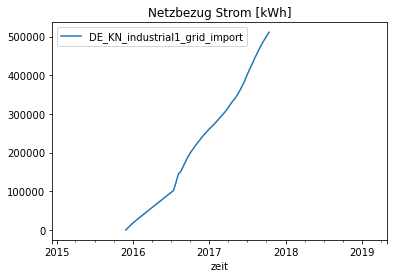

In [6]:
plas = pd.read_csv('https://data.open-power-system-data.org/household_data/2020-04-15/household_data_15min_singleindex.csv')

zeit = plas.utc_timestamp.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
plas['zeit'] = zeit
plas.plot(x='zeit', y='DE_KN_industrial1_grid_import', title='Netzbezug Strom [kWh]');

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Was sieht man hier? Wie hoch ist der Bedarf an elektrischer Energie jährlich?
</div>

*Antwort:...*

#### Energieinfrastruktur aus Begehung ersichtlich

- Photovoltaikanlage auf dem Hallendach
- Druckluftaggregat
- Heizkraftwerk für Heizung im Winter
- Wärmetauscher, Transformator
- Wärmenetz für Heißwasser und Kühlwasser
- Druckluftnetz
- Gasnetz
- Brauch- und Abwassernetze
- Pumpen für die Verteilung
- Druckspeicher
- Akkumulatoren in der unterbrechungsfreien Stromversorgung

#### Energieverbraucher

wichtigste Anlagen sind Blasformanlagen (ähnlich Spritzgußanlagen)
- in der [ersten Minute dieses Videos](https://www.youtube.com/watch?v=hm25WMoFJm4&feature=youtu.be) sieht man, was eine Blasformanlage tut, [das Video hier zeigt eine Nahaufnahme (Dauer 1 Minute)](https://www.youtube.com/watch?v=iQ9S6b5r0-E&feature=youtu.be)
- das Datenblatt der Maschinen ist nicht mehr auffindbar

Datenblatt einer ähnlichen Maschine {cite:p}`mauser_packaging_datenblatt_2020`:
- 2 m³ Druckluft pro Minute
- 35 m³ Kaltwasser pro Stunde
- 285 kW elektrischer Anschluss
- durchschnittlicher Verbrauch 171 kWh

weitere Energieverbraucher:
- Druckluftaggregat
- Beleuchtung
- Aufzüge

#### Energierückgewinnung

bisher findet keinerlei Energierückgewinnung statt

#### Emissionen

eine aktuelle Emissionsmessung steht an, die Ergebnisse sind noch nicht bekannt

### Ist-Zustand darstellen

Es ergibt sich ein ähnliches Bild wie in der Fallstudie in {cite:p}`hesselbach_energie-_2012`: 
- 100% Primärenergiebedarf
- 56,9% Verluste
- 16,5% Technische Gebäudeausrüstung (TGA)
- 18,2% Maschine
- 8,4% Blasformprozess

Zusätzlich zur Hilfe für das Sankey-Modul in `matplotlib` beschreibt auch {cite:p}`frolians_blog_tutorial_2016`, wie man Sankey-Diagramme in python erstellen kann und das Folgende ist daran angelehnt.

(-32.75046506237939, 4.920223243003482)

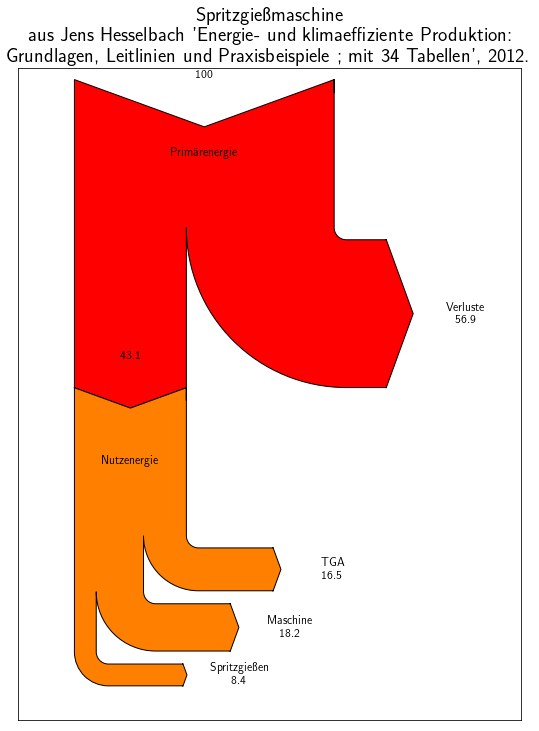

In [7]:
fig = plt.figure(figsize=(9,12))
ax = fig.add_subplot(1,1,1,xticks=[],yticks=[],
                    title="Spritzgießmaschine \naus Jens Hesselbach 'Energie- und klimaeffiziente Produktion: \nGrundlagen, Leitlinien und Praxisbeispiele ; mit 34 Tabellen', 2012.")
energie = [100,100-56.9,16.5,18.2,8.4]
labels = ['Primärenergie', 'Nutzenergie', 'TGA', 'Maschine', 'Spritzgießen']
farben = ["#FF0000", "#FF8000"]

sankey = Sankey(ax = ax, scale = .15, offset = 3, unit ='%', gap = 0.75, radius = 0.7, shoulder = 0.03, head_angle=140, tolerance = 1e-6)
for input_energie, output_energie, label, prior, farbe in zip(energie[:-1], energie[1:], labels, [None, 0], farben):
    if prior != 0:
        sankey.add(flows=[input_energie, -output_energie, output_energie - input_energie], orientations=[0, 0, 1], patchlabel=label, labels=['', None, 'Verluste'], prior=prior, connect=(.5, 0), pathlengths=[0, 0, 3], trunklength=10., rotation=-90, facecolor=farbe)
    else:
        sankey.add(flows=[energie[1], -energie[2], -energie[3], -energie[4]], orientations=[0, 1, 1,1], patchlabel=label, labels=['', labels[2], labels[3], labels[4]], prior=prior, connect=(1, 0), pathlengths=[0, 5, 5, 5], trunklength=10., rotation=-90, facecolor=farbe)
diagrams = sankey.finish()
for diagram in diagrams: 
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize(12)
    for text in diagram.texts: 
        text.set_fontsize(12)
ylim = plt.ylim()
plt.ylim(ylim[0]*1.05, ylim[1])

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche weiteren Darstellungen empfehlen Sie und welche Daten werden dafür benötigt? Sehen Sie auch in der VDI 3922 nach, ob weitere Darstellungen gefordert sind.
</div>

*Antwort:...*

### Allgemeine Beschreibung Maßnahmen zur rationellen Energienutzung {cite:p}`verein_deutscher_ingenieure_vdi_1998`

1. **Energienutzung vermeiden**
2. **Energienutzung senken**
3. **Wirkungs- und Nutzungsgrade verbessern**
4. **Energie rückgewinnen**
5. **Temperaturniveaus anpassen** {cite:p}`hesselbach_energie-_2012`
6. **Energieflüsse integrieren** {cite:p}`hesselbach_energie-_2012`

#### Beispiele für Vermeiden von unnötigem Energieverbrauch

- unnötigen Leerlauf vermindern
- in produktionsfreien Zeiten abschalten
- unnötige Aufheiz- und Abkühlvorgänge vermeiden
- Prozessparameter und Sicherheitsreserven überprüfen zusammen mit den Prozessexperten

#### Beispiele für Senken des spezifischen Energieverbrauchs

Wahl von energetisch günstigeren Technologien
- mechanische (z. B. Schleudern) statt thermische Trocknung
- Wärmedämmung
- elektronische statt konventioneller verlustarmer Vorschaltgeräte für Leuchtstoffröhren - oder gleich LED-Technik
- Reinigung bei niedrigeren Temperaturen (mit anderem Reinigungsmittel)

#### Beispiele für das Verbessern der Wirkungs- und Nutzungsgrade

- Auslastung der Produktionsanlagen optimieren
- Verteilungsverluste reduzieren, z. B. Druckluftleckagen, Blindleistungsverluste
- sorgfältig Instand halten
- Koppeln von Kraft- und Wärmeproduktion, Brennwertnutzung
- optimal geeignete Energieträger einsetzen (z. B. Öl als Kühlmedium statt Wasser, falls höhere Temperaturen gefragt sind oder angepasste Brennstoffe, mit Gas heizen statt Strom)
- lastabhängige Drehzahlregelung (mit Frequenzumrichtern einfach realisierbar)
- effizientere Motoren

#### Beispiele für Energierückgewinnung

- [ ] TODO diese allgemeinen Beispiele ausgliedern

- Wärme rückgewinnen mit folgender Priorität
 1. im selben Prozess nutzen
 2. betriebsintern nutzen, z. B. Luft vorwärmen, Wärmepumpe
 3. Abwärme auskoppeln und an Dritte liefern (Wärmeübertragung, ggf. aufwerten mit zusätzlich eingesetzter Energie)
- Reststoffe energetisch nutzen
- Energie bei Entspannung (z. B. Erdgas) rückgewinnen

#### Beispiele für die Anpassung von Temperaturniveaus

- Kühlwassertemperatur erhöhen
- Freikühlung statt Kompressionskälte verwenden

#### Beispiele für die Integration von Energieströmen

- kalte (ohne Maschinen) und warme (mit Maschinen) Räume miteinander verbinden, so dass der eine im Sommer gekühlt, der andere im Winter gewärmt wird
- Abwärme aus der Drucklufterzeugung zur Erwärmung in einem anderen Prozess nutzen

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Sammeln Sie anhand der genannten Beispiele mindestens 10 konkrete Ideen, wie für das Blasformunternehmen Energieverbrauch gesenkt werden könnte.
</div>

*Antwort:...*

#### Einsparpotenziale beim Rohstoff (nach {cite:p}`hesselbach_energie-_2012`)

**ökologischer Rucksack**: Herstellung eines Kunststoffs ist materialabhängig mehr oder weniger energieaufwendig (im Mittel 72% der Treibhausgasemissionen), $CO_2$-Fussabdruck pro kg Kunststoff zwischen ca. 1 und 12 kg $CO_2$ bei Neu-Kunststoffen, Rezyklate sind wieder anders zu bewerten<br><br>
**im Betrieb direkt wirksame Einflüsse**: 
- materialabhängige Schmelzenthalpien $\to$ energetischer Aufwand zum Schmelzen und Erstarren entsprechend unterschiedlich, z. B. 0,125 kWh/kg für das Schmelzen von 1 kg Polystyrol bzw. 0,22 kWh/kg für 1 kg Polyamid
- materialabhängige Schmelztemperaturen

**Materialauswahl hat großen Einfluss auf $CO_2$-Bilanz und Energieverbrauch.**

#### Einsparpotenziale bei der Vorbehandlung (nach {cite:p}`hesselbach_energie-_2012`)

einige Kunststoffgranulate müssen **vor der Verarbeitung getrocknet** werden - **mit hohem Wärmebedarf**

- die bestehende Anlage könnte historisch gewachsen aus mehreren dezentralen Trocknern und einem zentralen Trockner bestehen
- die kleinen Trockner haben typischerweise einen kleinen Energienutzungsgrad ({cite:p}`hesselbach_energie-_2012` nennt ca. 50%)
- die großen Trockner haben einen höheren Energienutzungsgrad ({cite:p}`hesselbach_energie-_2012` nennt ca. 70%)
- erweitert man die zentrale Trocknungsanlage, so können die dezentralen Trockner abgeschaltet werden und es ergibt sich eine Energieeinsparung ({cite:p}`hesselbach_energie-_2012` erreichte eine Einsparung von 393 MWh/a auf 293 MWh/a)

#### Einsparpotenziale bei Blasformmaschinen

Neben der Druckluft sind ähnliche Energieverbräuche wie bei Spritzgießmaschinen zu erwarten. {cite:p}`hesselbach_energie-_2012` nennt hier:

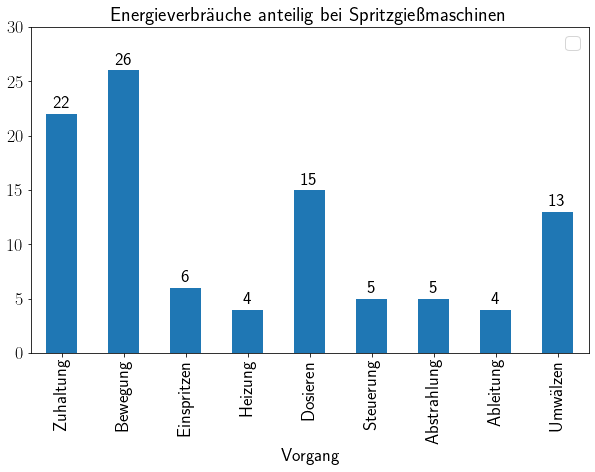

In [8]:
fig,ax = plt.subplots()
spritzgiessenergieverbrauche = [['Zuhaltung', 22], ['Bewegung', 26], ['Einspritzen', 6], ['Heizung', 4], ['Dosieren', 15], ['Steuerung', 5], ['Abstrahlung', 5], ['Ableitung', 4], ['Umwälzen', 13]]
spritzgiessEnergie = pd.DataFrame(spritzgiessenergieverbrauche, columns = ['Vorgang', 'Anteil [%]'])
spritzgiessEnergie.plot.bar(x = 'Vorgang', y = 'Anteil [%]', title='Energieverbräuche anteilig bei Spritzgießmaschinen',ax=ax)
ax.set_ylim(0,30)
ax.legend([])
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=0), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')

**Einsparpotenziale**: 
- Antriebstechnik
- Extruderbeheizung
- Kühlsystem
- Druckluftsystem

**Potenziale in der Antriebstechnik**: 
- effizientere Elektromotoren siehe [EU Ökodesign Richtlinie](https://ec.europa.eu/info/energy-climate-change-environment/standards-tools-and-labels/products-labelling-rules-and-requirements/energy-label-and-ecodesign/energy-efficient-products/electric-motors_en)
- Energierückgewinnung mit Servomotoren siehe {cite:p}`kunststoff-magazin_neues_2015`
- effizientere Hydraulik
- rein elektrische Maschinen bis zu 60% effizienter, v.a. falls Materialdurchsatz eher niedrig (kleinere Teile)
- Antrieb für mehrere Blasformen gleichzeitig siehe {cite:p}`kunststoff-magazin_neues_2015`

**Potenziale bei der Extruderbeheizung**:
- zur Zeit Strom üblich
- direkte Beheizung mit Erdgas nur in Einzelfällen für sehr große Maschinen
- bzw. die (alte, sicherheitstechnisch anspruchsvollere) Lösung der Nutzung eines Thermalölkreislaufs ($\vartheta \approx 300°C$) $\to$ im Beispiel in \cite{hesselbach_energie-_2012} Primärenergieersparnis von ca. 50%
- Möglichkeit zur *Abwärmenutzung*: Beheizung des Thermalöls in KWK-Anlage (Gasturbine) $\to$ ganzjährige Ausnutzung der KWK verbessert, ggf. zusätzlich Granulattrockner versorgen

**Einsparpotenziale beim Kühlsystem**: 
- **Freikühlsysteme im mitteleuropäischen Klima**: über einen großen Zeitraum des Jahres führen zu einer Entlastung der Kompressionskältemaschinen
- **getrennte Kühlkreisläufe für Werkzeug und Maschine**: Werkzeug weiterhin mit 12°C kühlen, Freikühlung ganzjährig zur Kühlung der restlichen Maschine (Hydraulik, Steuerung, Tragkörper) mit max. 30°C
- **Wärmerückgewinnung**: Abwärme für eine Absorptionskältemaschine mit einem COP von 0,65 einsetzen zur Teilsubstitution der Kompressionskältetechnik

*im Beispiel der Spritzgießmaschinen bei {cite:p}`hesselbach_energie-_2012` mit knapp 1200 MWh/a Kühllast (elektrische Energieaufnahme) durch Kompressionskälte*: Verbesserung durch Freikühlung um 44%, durch Trennung der Kühlkreisläufe um weitere 76%, durch Absorptionskälte um weitere 89%, auf gesamt 11%

**Einsparpotenziale beim Prozess**: 
- Je nachdem, wann eine Fertigungslinie geplant wurde und wie sie aktuell ausgelastet ist, ergeben sich Produktionssystem-Optimierungs-Potenziale, die auch die Energieeffizienz häufig verbessern.
- Ziele: gleichmäßige Auslastung einer Linie erreichen, Wartezeiten innerhalb der Linie reduzieren, unnötige Wege (Menschen oder Produkte) minimieren
- gute Möglichkeit der Einbindung der Mitarbeiter, ohnehin häufig üblich über sog. kontinuierlichen Verbesserungsprozess (jap. Kaizen, engl. continuous improvement process CIP, deutsch KVP)
- über Verbesserungsvorschlagswesen werden Mitarbeiter an finanziellen Einsparungen des Unternehmens beteiligt
- Mitarbeiter an den Linien und Prozessingenieure wissen am ehesten, was geht und was nicht geht, wenn es darum geht, am Prozess Parameter zu verändern, z. B. eine Maschine woanders aufzustellen

**Einsparpotenziale bei der technischen Gebäudeausrüstung (TGA)**: Wärmebedarf z. B. durch thermische Gebäudesimulation ermitteln (Undichtigkeit der Gebäude, Luftwechselrate bei natürlicher Ventilation durch Fenster, Türen, Tor) und durch Verbrauchsdaten verifizieren
- **Heizenergie reduzieren**: Nachtabsenkung, Absenkung in Lagerbereichen
- **Wärmebrücken reduzieren**: Abdichtung Gebäudehülle, Optimierung Gebäudedämmung, temperaturgesteuerte Lüftungsklappen
- **Energieströme integrieren**: Räume mit wenig Maschinen (wenig Abwärme, daher Heizbedarf) mit Räumen mit viel Abwärme durch Maschinen verbinden $\to$ weniger Kühlbedarf im Sommer, weniger Heizbedarf im Winter

**Einsparpotenziale bei der Energieversorgung**: 
- trotz Abwärme von Blasformanlagen Heizbedarf zu erwarten
- falls eigenständige Wärmeversorgung gewünscht: Blockheizkraftwerk ggf. sinnvoll
- Kopplung mit Heizung (Winter) und Kühlung (Sommer, über Absorptionskältemaschinen), hoher Ausnutzungsgrad (>80%) realisierbar
- zusätzlich Wandlerverluste reduzieren: Druckluftantriebe durch Servomotoren ersetzen, Wärmerückgewinnung zwischen Blasformmaschinen und Granulattrocknung, allerdings: Erhöhung des Heizbedarfs (weniger Abwärme)
- {cite:p}`hesselbach_energie-_2012` erreichte bei Nutzung eines BHKW eine Kostenreduktion um ca. 30% bei Spritzgießmaschinen

### Gesamtkonzept entwickeln: systemische Analyse

- alle oben entwickelten Ideen auf technische und wirtschaftliche Machbarkeit hin untersuchen
- alle dann noch machbaren Ideen miteinander kombinieren in unterschiedlichen Gesamtkonzepten
- Gesamtkonzepte bezüglich folgender Punkte vergleichbar machen:
 - erzielbare betriebswirtschaftliche Effekte (VDI 2067 Annuitätenrechnung)
 - erforderlicher Invest
 - Energieverbrauchs-Minderung
 - energiebedingte Umweltbelastungen
 - Auswirkungen auf Technologie und Produktqualität
 - Sensitivitäten darstellen für unsichere Entwicklungen
- Je nach Fall weitere Kriterien betrachten:
 - Versorgungssicherheit
 - Emissionsbilanz
 - zu erwartende behördliche Vorschriften, Förderprogramme
 - Innovationsgrad und -risiko
 - zu erwartende regionale Energieversorgungskonzepte (Strukturwandel!)
 - markt- und branchenspezifische Entwicklungstendenzen
 - Image des Unternehmens
 - soziale und innerbetriebliche Akzeptanz
 - unternehmensspezifische Weiterentwicklung (z. B. neue Standorte)
 - Flexibilität der Konzepte

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie könnten sich Energiesparmaßnahmen auf die Produktqualität des Blasformunternehmens auswirken? Warum?
</div>

*Antwort:...*

### Iteratives Vorgehen

nach jedem Schritt überprüfen, ob der Ist-Zustand nun anders beschrieben werden muss, ob daraufhin andere Vorschläge sinnvoll sind, etc.

![VorgehenEnergieberatung](../img/vorgehen-energieberatung.png)

## Literatur

```{bibliography}
:filter: docname in docnames
```

# References

(<a id="cit-hesselbach_energie-_2012" href="#call-hesselbach_energie-_2012">Hesselbach, 2012</a>) Jens Hesselbach, ``_Energie- und klimaeffiziente Produktion: Grundlagen, Leitlinien und Praxisbeispiele ; mit 34 Tabellen_'',  2012.

